## Domain Knowledge 2 : 광고성과지표
| 광고성과지표 | = | 계산식 |
|:---------- |---------- |:---------- |
|CTR(Click Through Rate)|=|클릭수 / 노출수 * 100|
|CPM(Cost Per Mile)|=|광고비용 / 노출수 * 1000|
|CPC(Cost Per Click)|=|광고비용 / 클릭수|
|CPA(Cost Per Action)|=|광고비용 / 구매수|




In [1]:
imp = 10000 # 노출수 (impression)
clk = 100 # 클릭수 (click)
conv = 10 # 구매전환 (conversion)
cost = 100000 # 광고비용 (cost)

# ↑ 광고 마케팅을 통해 나온 지표

In [2]:
# ctr 
ctr = clk / imp * 100
ctr

1.0

In [3]:
# cpm
cpm = cost / imp * 1000
cpm

10000.0

In [4]:
# cpc
cpc = cost / clk
cpc

1000.0

In [5]:
# cpa
cpa = cost / conv
cpa

10000.0

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
# matplotlib 한글 폰트 출력코드
# 출처 : 데이터공방( https://kiddwannabe.blog.me)

import matplotlib
from matplotlib import font_manager, rc
import platform

try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False  



In [8]:
# 전체적인 보고서의 구성 들여다 보기

# 광고그룹 x 키워드 가 있는데.
# 하나의 광고그룹에 키워드가 여러개 있는 형태입니다.
# ex) 올인원패키지 : '업무자동화_VBA ' 광고그룹 하에 '엑셀배우기', '엑셀자격증' 키워드들이 있다.
# 각 키워드 별로 '노출수' '클릭수' '클릭률%' '평균클릭비용' '총비용' 이 세팅되어 있다.

## 분석목표 : 
1. 중점관리 키워드, 저효율 키워드 추출
2. 중점관리 광고그룹, 저효율 광고그룹 추출

In [9]:
# 실제 현업에서 
# 마케팅 쪽 데이터를 다루게 되면 '광고그룹' 과 '키워드' 가 굉~장히 많습니다.
#   ex) 광고그룹 수백개..  키워드 90,000개 이상.  ---> 엑셀로 다루기에는 한계가 있다.
#   ==>  과연 어떠한 '광고그룹', 어떠한 '키워드' 를 중점적으로 키워야 하지??   단순 엑셀 작업으로는 추려내기 힘들수도 있다.
#     ==> 그러면 데이터 중심의 운영이 아니라 '감/경험' 에 의존한 운영을 하게 된다.

# 파이썬을 통해서 어떻게 대량 데이터를 어떻게 파악하고, 또 어떻게 분석할수 있느냐를 알아보도록 하겠습니다.


# 분석과정
1. 데이터 전처리
1. 데이터 탐색
1. 시각화
1. 데이터 분석

---
# 1. 데이터 전처리
- 엑셀 파일 읽기
- 열단위 수치연산 및 데이터 타입 다루기

In [10]:
filepath = r'D:\DevRoot\DataSet\네이버보고서.xls'

In [11]:
df = pd.read_excel(filepath)
df.head()

,"캠페인보고서(2019.02.01.~2019.04.30.),ftasia",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
1,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606,0.414149,261.549,2512444
2,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.04991,295.975,2384965
3,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324,0.028475,4841.66,1568699
4,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593,1175174


#### skiprows 를 사용하여 불필요한 행 제거

In [12]:
df = pd.read_excel(filepath, skiprows=[0])  # list 로 빼버릴 row 들 지정
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
4,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903


In [13]:
# 실제 원본 데이터는 , 데이터 제공자 측에서 첫번째 행에 '개요' 등의 내용을 넣는 경우가 많다.
# 그래서 이와 같이 읽어올때 skiprows 등을 활용하여 걸러내야 한다.

In [14]:
pd.read_excel(filepath, skiprows=[1]) 

,"캠페인보고서(2019.02.01.~2019.04.30.),ftasia",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
4,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903
...,...,...,...,...,...,...,...
1376,올인원 패키지 : 업무자동화_3. 엑셀,엑셀셀서식,24016,0.0,0.000000,0.000000,0
1377,올인원 패키지 : 업무자동화_3. 엑셀,MATCH,32287,0.0,0.000000,0.000000,0
1378,마케팅KPI수립,LTV,32602,0.0,0.000000,0.000000,0
1379,data_camp_rmp_8,DECISION,60844,0.0,0.000000,0.000000,0


In [15]:
pd.read_excel(filepath, skiprows=[0, 2, 4]) # 여러 행 제거 가능

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965
1,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
2,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903
3,6. 파이썬,파이썬,384522,260.4,0.067720,3705.360983,964876
4,1. 코딩,코딩,562162,271.2,0.048242,3243.215339,879560
...,...,...,...,...,...,...,...
1374,올인원 패키지 : 업무자동화_3. 엑셀,엑셀셀서식,24016,0.0,0.000000,0.000000,0
1375,올인원 패키지 : 업무자동화_3. 엑셀,MATCH,32287,0.0,0.000000,0.000000,0
1376,마케팅KPI수립,LTV,32602,0.0,0.000000,0.000000,0
1377,data_camp_rmp_8,DECISION,60844,0.0,0.000000,0.000000,0


In [16]:
df.shape

(1381, 7)

### 결측치 확인
isnull(), info()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   광고그룹             1381 non-null   object 
 1   키워드              1381 non-null   object 
 2   노출수              1381 non-null   int64  
 3   클릭수              1381 non-null   float64
 4   클릭률(%)           1381 non-null   float64
 5   평균클릭비용(VAT포함,원)  1381 non-null   float64
 6   총비용(VAT포함,원)     1381 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 75.6+ KB


In [18]:
# isnull()  : 결측이면 True,  아이면 False
# notnull() : 결측이면 False, 아리면 True  (isnull() 과 정반대)

In [19]:
df.isnull()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1376,False,False,False,False,False,False,False
1377,False,False,False,False,False,False,False
1378,False,False,False,False,False,False,False
1379,False,False,False,False,False,False,False


In [20]:
df.notnull()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...
1376,True,True,True,True,True,True,True
1377,True,True,True,True,True,True,True
1378,True,True,True,True,True,True,True
1379,True,True,True,True,True,True,True


In [22]:
# 열단위 결측치 확인
df.isnull().sum()

# True + True => 1
# 산술계산에서 True 는 1 로 계산된다.  합계를 구하면 결측치의 개수가 나온다.

광고그룹               0
키워드                0
노출수                0
클릭수                0
클릭률(%)             0
평균클릭비용(VAT포함,원)    0
총비용(VAT포함,원)       0
dtype: int64

In [23]:
# 결측치 확인 - 행단위
df.isnull().sum(axis = 1)  

0       0
1       0
2       0
3       0
4       0
       ..
1376    0
1377    0
1378    0
1379    0
1380    0
Length: 1381, dtype: int64

### 데이터프레임의 열 단위 수치연산 및 데이터 타입 다루기
- 클릭수(반올림처리, 일의 자리수로 변경)
- 클릭률
- 평균클릭비용(VAT포함,원)

#### 클릭수 전처리

In [24]:
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
4,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903


In [25]:
# 클릭수 열을 잘 관찰해보면
#  1863.6, 813.6  과 같은 수치 들이 있다.  (응 클릭수 인데 소숫점?)
# 클릭의 최소단위는 1이어야 함.

# 그래서, 클릭수 열에 round함수 적용하여 전처리 할겁니다.
# ↓

In [26]:
df['클릭수']

0       9606.0
1       8058.0
2        324.0
3       1863.6
4        813.6
         ...  
1376       0.0
1377       0.0
1378       0.0
1379       0.0
1380       0.0
Name: 클릭수, Length: 1381, dtype: float64

In [28]:
clk = round(df['클릭수'], 0)
clk

0       9606.0
1       8058.0
2        324.0
3       1864.0
4        814.0
         ...  
1376       0.0
1377       0.0
1378       0.0
1379       0.0
1380       0.0
Name: 클릭수, Length: 1381, dtype: float64

In [29]:
# 소숫점 제거 -> 실수(float) -> 정수(int)로 변경
clk.astype(int)

0       9606
1       8058
2        324
3       1864
4        814
        ... 
1376       0
1377       0
1378       0
1379       0
1380       0
Name: 클릭수, Length: 1381, dtype: int32

In [30]:
# 기존 컬럼데이터 대체
df['클릭수'] = clk.astype(int)

In [31]:
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1864,0.268489,630.593475,1175174
4,3. html,HTML,9626374,814,0.008452,1408.435349,1145903


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   광고그룹             1381 non-null   object 
 1   키워드              1381 non-null   object 
 2   노출수              1381 non-null   int64  
 3   클릭수              1381 non-null   int32  
 4   클릭률(%)           1381 non-null   float64
 5   평균클릭비용(VAT포함,원)  1381 non-null   float64
 6   총비용(VAT포함,원)     1381 non-null   int64  
dtypes: float64(2), int32(1), int64(2), object(2)
memory usage: 70.3+ KB


### 전처리 : 클릭률

- **클릭률** : CTR  (Click Through Rate)
- CTR = 클릭수 / 노출수 * 100<br>
=> 위에서 **'클릭수'** 가 모두 변경되었으므로 기존 클릭률(%) 열 데이터 갱신(변경) 필요하다

이러한 전처리를 어떻게 하는지 보자

In [33]:
df['클릭수']

0       9606
1       8058
2        324
3       1864
4        814
        ... 
1376       0
1377       0
1378       0
1379       0
1380       0
Name: 클릭수, Length: 1381, dtype: int32

In [34]:
df['노출수']

0       2319456
1        767491
2       1137840
3        694106
4       9626374
         ...   
1376      24016
1377      32287
1378      32602
1379      60844
1380      61193
Name: 노출수, Length: 1381, dtype: int64

In [35]:
# ctr
df['클릭수'] / df['노출수'] * 100

0       0.414149
1       1.049915
2       0.028475
3       0.268547
4       0.008456
          ...   
1376    0.000000
1377    0.000000
1378    0.000000
1379    0.000000
1380    0.000000
Length: 1381, dtype: float64

In [36]:
df.columns

Index(['광고그룹', '키워드', '노출수', '클릭수', '클릭률(%)', '평균클릭비용(VAT포함,원)',
       '총비용(VAT포함,원)'],
      dtype='object')

In [37]:
# 클릭률 칼럼 대체
df['클릭률(%)'] = df['클릭수'] / df['노출수'] * 100

In [38]:
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1864,0.268547,630.593475,1175174
4,3. html,HTML,9626374,814,0.008456,1408.435349,1145903


In [39]:
# jupyter notebook Tip
# 컬럼명이 너무 길다?
# df['클'] <-- 요 정도만 타이핑 하고 TAB 활용
# df['클릭률(%)'] 자동완성

### 전처리: 평균클릭비용 (CPC, Cost per Click) 

- 평균클릭비용 : 칼럼명에 원 단위로 명시됨<br>
 => 반올림처리, 일의 자리수로 변경
 
 ('클릭수' 전처리와 비슷)

In [40]:
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1864,0.268547,630.593475,1175174
4,3. html,HTML,9626374,814,0.008456,1408.435349,1145903


In [42]:
cpc = round(df['평균클릭비용(VAT포함,원)'], 0)
cpc

0        262.0
1        296.0
2       4842.0
3        631.0
4       1408.0
         ...  
1376       0.0
1377       0.0
1378       0.0
1379       0.0
1380       0.0
Name: 평균클릭비용(VAT포함,원), Length: 1381, dtype: float64

In [43]:
# 기존 평균클릭비용 대체
df['평균클릭비용(VAT포함,원)'] = cpc.astype(int)

In [44]:
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606,0.414149,262,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.049915,296,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324,0.028475,4842,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1864,0.268547,631,1175174
4,3. html,HTML,9626374,814,0.008456,1408,1145903


---
# 2. 데이터 탐색

In [45]:
df.describe()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
count,1.381000e+03,1381.000000,1381.000000,1381.000000,1.381000e+03
mean,3.505415e+04,52.504707,0.352023,981.624909,3.791958e+04
std,2.964650e+05,387.513479,1.000998,1372.401050,1.421492e+05
min,1.001000e+03,0.000000,0.000000,0.000000,0.000000e+00
25%,1.814000e+03,1.000000,0.006539,64.000000,7.700000e+01
50%,3.805000e+03,4.000000,0.056721,396.000000,2.123000e+03
75%,1.073400e+04,14.000000,0.243309,1303.000000,1.743500e+04
max,9.626374e+06,9606.000000,13.590551,9363.000000,2.512444e+06


In [46]:
# pandas 의 출력 옵션 설정
pd.set_option('display.float_format', '{:.2f}'.format)

In [47]:
df.describe()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
count,1381.00,1381.00,1381.00,1381.00,1381.00
mean,35054.15,52.50,0.35,981.62,37919.58
std,296465.03,387.51,1.00,1372.40,142149.16
min,1001.00,0.00,0.00,0.00,0.00
25%,1814.00,1.00,0.01,64.00,77.00
50%,3805.00,4.00,0.06,396.00,2123.00
75%,10734.00,14.00,0.24,1303.00,17435.00
max,9626374.00,9606.00,13.59,9363.00,2512444.00


In [48]:
df['광고그룹']

0        올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵
1              올인원 패키지 : 업무자동화_VBA
2            ㅍAOP 전체_중복키워드_디자인(삭제)
3       올인원 패키지 : 데이터 분석 입문 온라인_파콘
4                          3. html
                   ...            
1376         올인원 패키지 : 업무자동화_3. 엑셀
1377         올인원 패키지 : 업무자동화_3. 엑셀
1378                      마케팅KPI수립
1379               data_camp_rmp_8
1380                      4. 웹의 동작
Name: 광고그룹, Length: 1381, dtype: object

In [49]:
df['광고그룹'].unique()  # 광고그룹 안의 고유한 값들 출력

array(['올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵', '올인원 패키지 : 업무자동화_VBA',
       'ㅍAOP 전체_중복키워드_디자인(삭제)', '올인원 패키지 : 데이터 분석 입문 온라인_파콘', '3. html',
       '6. 파이썬', '1. 코딩', '2. C언어 일반', '프로그래밍 전체_파워컨텐츠_블록체인(삭제)',
       'AOP 전체_중복키워드_디자인', '디지털 마케팅 스쿨 13기_대표키워드', '인스타그램 마케팅',
       '블록체인 신사업 시작하기', 'AOP 전체_중복키워드_비지니스', '올인원 패키지 : 업무자동화_2. 파이썬',
       '올인원 패키지 : 1인 쇼핑몰 시작하기_00.창업_PC', '올인원 패키지 : 영상 제작/편집_6.프리미어프로',
       '1. 모바일앱개발_교육', '올인원 패키지 : UX/UI 디자인 입문_연관검색어',
       '올인원 패키지 : 데이터 분석 입문(파컨)', 'JavaScript BOOT CAMP', '1. 일반_PC',
       'AOP 전체_중복키워드_공통', 'AOP 전체_중복키워드_프로그래밍', '003.퍼포먼스 마케팅',
       '2. 프로그래밍', '마케팅 유치원', '올인원 패키지 : 업무자동화_1. 자동화', '올인원 패키지 : 브랜딩',
       'ㅍ올인원 패키지 : 브랜딩', '올인원 패키지 : 콘텐츠 마케팅_카피라이팅',
       'AOP 전체_중복키워드_데이터사이언스', '8. 시스템 프로그래밍',
       'ㅍ올인원 패키지 : UX/UI 디자인 입문_연관검색어(삭제)', '올인원 패키지 : 프로그래밍 첫걸음 시작하기',
       '페이스북&인스타그램 마케팅 실전', 'Python & Django를 활용한 웹 서비스_개발자', '5. 자료구조',
       'fin_camp_auction_6', '올인원 패키지 : 1인 쇼핑몰_00.창업_MO', '타이포그래피와 편집디자인',
       '올인원 패키

In [50]:
len(df['광고그룹'].unique()) # 광고그룹 갯수

186

In [51]:
df['키워드'].unique()

array(['-', '일러스트', 'HTML', ..., 'MATCH', 'DECISION', 'REST'],
      dtype=object)

In [52]:
len(df['키워드'].unique())

1112

In [53]:
# 고유값 빈도
df['광고그룹'].value_counts()

올인원 패키지 : 업무자동화_3. 엑셀            93
AOP 전체_중복키워드_디자인                 57
#000_마케팅 전체_main                 48
ㅍAOP 전체_중복키워드_디자인(삭제)            46
리눅스 인프라                          26
                                 ..
자율주행 연구를 위한 ROS·SLAM Workshop     1
올인원 패키지 : 금융공학/퀀트_00.일반           1
디지털 마케팅                           1
UX 디자인 실전                         1
ㅍAOP 전체_중복키워드_공통(삭제)              1
Name: 광고그룹, Length: 186, dtype: int64

In [54]:
df['키워드'].value_counts()

-               8
포토샵             5
GUI             5
구글광고            5
퍼포먼스마케팅         4
               ..
TENSORFLOW설치    1
파이썬프로그램         1
벤처투자            1
PCA             1
SNS홍보           1
Name: 키워드, Length: 1112, dtype: int64

In [56]:
#  노출수 정렬
df['노출수'].sort_values()

1057       1001
445        1003
597        1005
983        1006
442        1007
         ...   
13      1470452
9       1887822
0       2319456
173     3095998
4       9626374
Name: 노출수, Length: 1381, dtype: int64

In [57]:
df['노출수'].sort_values(ascending=False) # 내림차순

4       9626374
173     3095998
0       2319456
9       1887822
13      1470452
         ...   
442        1007
983        1006
597        1005
445        1003
1057       1001
Name: 노출수, Length: 1381, dtype: int64

# 3. 시각화를 통한 데이터 탐색

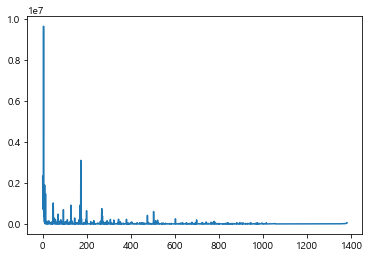

In [59]:
df['노출수'].plot()
plt.show()

In [60]:
df['노출수']

0       2319456
1        767491
2       1137840
3        694106
4       9626374
         ...   
1376      24016
1377      32287
1378      32602
1379      60844
1380      61193
Name: 노출수, Length: 1381, dtype: int64

In [62]:
imp_sort = df['노출수'].sort_values()
imp_sort

1057       1001
445        1003
597        1005
983        1006
442        1007
         ...   
13      1470452
9       1887822
0       2319456
173     3095998
4       9626374
Name: 노출수, Length: 1381, dtype: int64

In [63]:
imp_sort.reset_index()

,index,노출수
0,1057,1001
1,445,1003
2,597,1005
3,983,1006
4,442,1007
...,...,...
1376,13,1470452
1377,9,1887822
1378,0,2319456
1379,173,3095998


In [64]:
imp_sort = imp_sort.reset_index()
imp_sort

,index,노출수
0,1057,1001
1,445,1003
2,597,1005
3,983,1006
4,442,1007
...,...,...
1376,13,1470452
1377,9,1887822
1378,0,2319456
1379,173,3095998


In [66]:
imp_sort.drop('index', axis=1)

,노출수
0,1001
1,1003
2,1005
3,1006
4,1007
...,...
1376,1470452
1377,1887822
1378,2319456
1379,3095998


In [67]:
imp_sort.drop('index', axis=1, inplace=True)  # 원본 변경

In [68]:
imp_sort

,노출수
0,1001
1,1003
2,1005
3,1006
4,1007
...,...
1376,1470452
1377,1887822
1378,2319456
1379,3095998


<AxesSubplot:>

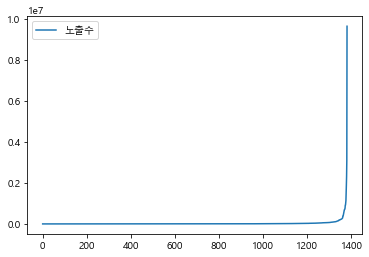

In [69]:
imp_sort.plot()

<AxesSubplot:>

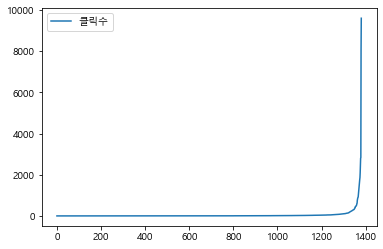

In [74]:
#  한줄로 만들기
((df['클릭수'].sort_values()).reset_index()).drop('index', axis=1).plot()

<AxesSubplot:>

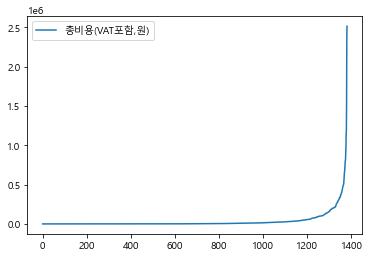

In [75]:
# 총비용

((df['총비용(VAT포함,원)'].sort_values()).reset_index()).drop('index', axis=1).plot()

In [ ]:
# 관찰 INSIGHT

# '노출수' '클릭수' 는 상위 5% 정도에 대한 데이터를 제외하곤 거의다 최솟값에 머물고 있다.
#  그런데 '총비용' 의 경우 약 15% 정도를 제외하곤 최솟값에 머물고 있다.

#  비용대비... 노출수, 클릭수 저조한 구간은 어디라고 판단하는가?

---
# 4. 데이터 분석

In [76]:
# 위 결과에서 상위 5% 가 클릭수, 노출수가 집중되고 있다.
# 이를 '중점 관리 키워드' 로 보고 추출해보도록 하자

## 중점관리키워드 추출
- 노출수, 클릭수 기준 상위 5%에 해당하는 키워드 추출 . 다음의 3단계를 거쳐야 함
 1. 95백분위수 찾기(quantile 함수 사용)
 2. 95백분위수 이상(상위 5%)의 노출수 추출
 3. 상위 5%에 해당하는 키워드 추출

In [78]:
imp = df['노출수']
imp

0       2319456
1        767491
2       1137840
3        694106
4       9626374
         ...   
1376      24016
1377      32287
1378      32602
1379      60844
1380      61193
Name: 노출수, Length: 1381, dtype: int64

In [80]:
#1. 95백분위수 찾기
# quntile() - 분위수 출력 (default: 중앙값, 2사분위수)
imp.quantile()

3805.0

In [81]:
imp.quantile(0)  # 최솟값

1001.0

In [82]:
imp.min()

1001

In [83]:
imp.quantile(1)  # 최댓값

9626374.0

In [84]:
imp.max()

9626374

In [85]:
# 95백분위수 =>
imp.quantile(0.95)

82858.0

In [87]:
#2. 95백분위수 이상 (상위 5%) 의 노출수(들) 추출
imp[imp > imp.quantile(0.95)]

0      2319456
1       767491
2      1137840
3       694106
4      9626374
        ...   
602     247898
698     196862
741      94933
777     126393
780      90041
Name: 노출수, Length: 69, dtype: int64

In [88]:
imp = imp[imp > imp.quantile(0.95)]

In [89]:
imp

0      2319456
1       767491
2      1137840
3       694106
4      9626374
        ...   
602     247898
698     196862
741      94933
777     126393
780      90041
Name: 노출수, Length: 69, dtype: int64

In [90]:
# 위 69개의 광고그룹 x 키워드는  상위 5% 의 노출수에 해당한다.
# 이 키워드들을 찾아내려면 어케 하나?

In [91]:
df

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606,0.41,262,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.05,296,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324,0.03,4842,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1864,0.27,631,1175174
4,3. html,HTML,9626374,814,0.01,1408,1145903
...,...,...,...,...,...,...,...
1376,올인원 패키지 : 업무자동화_3. 엑셀,엑셀셀서식,24016,0,0.00,0,0
1377,올인원 패키지 : 업무자동화_3. 엑셀,MATCH,32287,0,0.00,0,0
1378,마케팅KPI수립,LTV,32602,0,0.00,0,0
1379,data_camp_rmp_8,DECISION,60844,0,0.00,0,0


In [93]:
df_index = df.set_index('키워드')
df_index

,광고그룹,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
키워드,,,,,,
-,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,2319456,9606,0.41,262,2512444
-,올인원 패키지 : 업무자동화_VBA,767491,8058,1.05,296,2384965
일러스트,ㅍAOP 전체_중복키워드_디자인(삭제),1137840,324,0.03,4842,1568699
-,올인원 패키지 : 데이터 분석 입문 온라인_파콘,694106,1864,0.27,631,1175174
HTML,3. html,9626374,814,0.01,1408,1145903
...,...,...,...,...,...,...
엑셀셀서식,올인원 패키지 : 업무자동화_3. 엑셀,24016,0,0.00,0,0
MATCH,올인원 패키지 : 업무자동화_3. 엑셀,32287,0,0.00,0,0
LTV,마케팅KPI수립,32602,0,0.00,0,0


In [95]:
imp = df_index['노출수']

In [96]:
imp = imp[imp >= imp.quantile(0.95)]

In [97]:
imp  # '노출수' 상위 5%의 키워드들이 인덱스로 나온다!!

키워드
-         2319456
-          767491
일러스트      1137840
-          694106
HTML      9626374
           ...   
부동산스터디     196862
가상메모리       94933
프로모션        82858
앱스토어       126393
OS          90041
Name: 노출수, Length: 70, dtype: int64

In [99]:
# [도전] df_index 에서 '클릭수' 상위 5% 키워드 추출!
clk = df_index['클릭수']
clk = clk[clk >= clk.quantile(0.95)]
clk

키워드
-          9606
-          8058
일러스트        324
-          1864
HTML        814
           ... 
재태크         126
모스자격증       198
펀드하는법       248
채권투자        136
주식투자하는법     120
Name: 클릭수, Length: 70, dtype: int32

In [100]:
# '노출수' 상위 5%,  '클릭수' 상위 5% 출력

In [101]:
imp

키워드
-         2319456
-          767491
일러스트      1137840
-          694106
HTML      9626374
           ...   
부동산스터디     196862
가상메모리       94933
프로모션        82858
앱스토어       126393
OS          90041
Name: 노출수, Length: 70, dtype: int64

In [102]:
clk

키워드
-          9606
-          8058
일러스트        324
-          1864
HTML        814
           ... 
재태크         126
모스자격증       198
펀드하는법       248
채권투자        136
주식투자하는법     120
Name: 클릭수, Length: 70, dtype: int32

### 중점관리 키워드
- 노출수 와 클릭수 모두 상위 5% 이상

- DataFrame[(조건문) & (조건문)]

In [103]:
imp = df_index['노출수']
clk = df_index['클릭수']

In [104]:
result = df_index[(imp >= imp.quantile(0.95)) & (clk >= clk.quantile(0.95))]
result

,광고그룹,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
키워드,,,,,,
-,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,2319456,9606,0.41,262,2512444
-,올인원 패키지 : 업무자동화_VBA,767491,8058,1.05,296,2384965
일러스트,ㅍAOP 전체_중복키워드_디자인(삭제),1137840,324,0.03,4842,1568699
-,올인원 패키지 : 데이터 분석 입문 온라인_파콘,694106,1864,0.27,631,1175174
HTML,3. html,9626374,814,0.01,1408,1145903
파이썬,6. 파이썬,384522,260,0.07,3705,964876
코딩,1. 코딩,562162,271,0.05,3243,879560
C언어,2. C언어 일반,271370,154,0.06,5269,809358
가상화폐,프로그래밍 전체_파워컨텐츠_블록체인(삭제),91369,2838,3.11,283,803770


In [105]:
# 중점관리 키워드! 
result.index

Index(['-', '-', '일러스트', '-', 'HTML', '파이썬', '코딩', 'C언어', '가상화폐', '포토샵',
       '블록체인', '엑셀', '-', '포토샵', '컴퓨터활용능력', '컴퓨터활용능력2급', '컴퓨터활용능력1급', '포토샵',
       '-', '프리미어프로', '폰트', '스케치', '포토샵', '글씨체', '한글폰트', '마블', '바이럴마케팅'],
      dtype='object', name='키워드')

### 저효율 키워드 선별

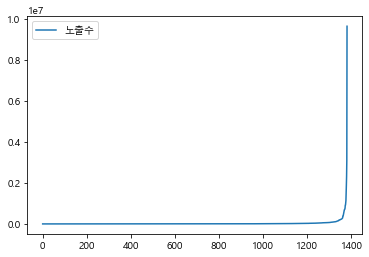

In [106]:
# '노출수'
imp_sort.plot()
plt.show()

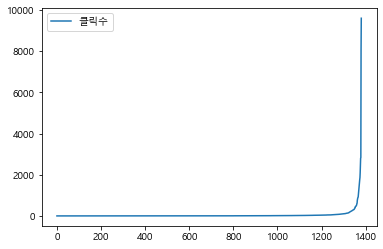

In [108]:
# '클릭수'
(((df['클릭수'].sort_values()).reset_index()).drop('index', axis=1)).plot()
plt.show()

<AxesSubplot:>

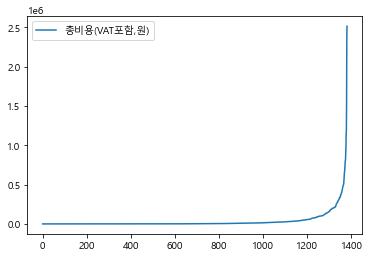

In [109]:
# 총비용

((df['총비용(VAT포함,원)'].sort_values()).reset_index()).drop('index', axis=1).plot()

In [110]:
# 노출이나 클릭이 잘 되지 않음에도 비용이 많이 들어가는 키워드 --> 저효율 키워드

- 노출수, 클릭수  기준 상위 5%의 키워드가 아닌데도 불구하고 비용이 많이 쓰이고 있는 저효율 키워드를 다음과 같이 정의했다 하자
 1. 노출수 95백분위수 미만
 2. 클릭수 95백분위수 미만
 3. 총비용 85백분위수 이상
 4. 총비용 95백분위수 미만
 
 ### # 조건이 여러개일  경우 
 - 데이터프레임[(조건문)&(조건문)]

In [113]:
cost = df_index['총비용(VAT포함,원)']
cost

키워드
-           2512444
-           2384965
일러스트        1568699
-           1175174
HTML        1145903
             ...   
엑셀셀서식             0
MATCH             0
LTV               0
DECISION          0
REST              0
Name: 총비용(VAT포함,원), Length: 1381, dtype: int64

In [115]:
result = df_index[(imp < imp.quantile(0.95)) & (clk < clk.quantile(0.95)) & (cost >= cost.quantile(0.85)) & (cost < cost.quantile(0.95))]
result

,광고그룹,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
키워드,,,,,,
온라인마케팅교육,올인원 패키지 : 디지털 마케팅_1. 디지털 마케팅,4712,54,1.15,3460,186846
온라인마케팅,AOP 전체_중복키워드_마케팅,25645,43,0.17,4294,185493
어플제작비용,1. 모바일앱개발_교육,1786,70,3.92,2653,184646
부동산경매,fin_camp_auction_6,5087,50,0.98,3606,181742
퍼포먼스마케팅,마케터를 위한 데이터 부트캠프,5131,55,1.07,3275,180774
...,...,...,...,...,...,...
PHP,Python & Django를 활용한 웹 서비스_개발자,11304,13,0.12,3490,46068
UXUI,AOP 전체_중복키워드_디자인,8957,28,0.31,1645,45408
SQL,올인원 패키지 : 파이썬 웹 개발_3.FLASK기초,7980,12,0.15,3781,45375


In [116]:
# 저효율 키워드!
result.index

Index(['온라인마케팅교육', '온라인마케팅', '어플제작비용', '부동산경매', '퍼포먼스마케팅', '블록체인', 'C++',
       '게임만드는프로그램', '엑셀배우기', '앱만들기', '영상제작', '쇼핑몰제작', '에프터이펙트', '어플리케이션제작',
       '강남빌딩매매', '웹디자인', '디지털마케팅', '포토샵강의', '구글애널리틱스자격증', 'PYTHON', '페이스북광고',
       '유튜브마케팅', '게임제작', '부동산투자', '마케팅전략', 'PYTHON', '홈페이지만들기', 'B2B사이트',
       'JAVASCRIPT', '파이썬강좌', '인스타그램광고', '동영상제작', 'SEO', '쇼핑몰창업', '인터넷쇼핑몰',
       '게임프로그래밍학원', '프로그래밍', '서울빌딩매매', '데이터사이언스', '모바일게임제작', '엑셀학원',
       '유튜브크리에이터', '엑셀VBA', '영상편집학원', '텐서플로우', '쇼핑몰홈페이지제작', '엑셀교육', '그로스해킹',
       '게임개발', '광고대행사', '통계학원', '모바일앱개발', '안드로이드앱만들기', '파이썬기초', '하이브리드앱',
       '온라인마케팅', '인디자인', '검색엔진최적화', '엑셀실무', '인터넷쇼핑몰제작', '상가빌딩매매', '퍼포먼스마케팅',
       '쇼핑몰', 'UX디자인', '유니티강좌', 'VBA', '코딩이란', 'SNS마케팅', 'GA자격증', '콘텐츠제작',
       '구글애널리틱스', 'UI디자인', '1인미디어', '포토샵자격증', '하이브리드앱', '포토샵자격증', '브랜드네이밍',
       '리플렛디자인', '데이터사이언티스트', '유니티3D', '자바스크립트', '일러스트레이터강좌', '데이터분석준전문가',
       '유튜브편집', '모션그래픽', '리플렛디자인', 'SPRING', '어도비일러스트레이터', 'SNS광고', '쇼핑몰촬영',
       '브랜드마케팅', '데이터분

In [117]:
# 이번에는 '키워드'중심분석
# 다음에는 '광고그룹' 중심으로 분석